<a href="https://colab.research.google.com/github/applesyeda/applesyeda/blob/main/Project_2_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

#Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
#Loading the data
filename = "/content/Date_Fruit_Datasets.xlsx"
df= pd.read_excel(filename)
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


There are no unnessary columns or rows to delete. All are also continuous, so I do not hope to take out an outliers as they may be indicative of something else, such as a deformity in the date.

Identified and addressed missing values

In [ ]:
#Checking for duplicates while counting the rows that it is duplicating from, but no duplicates!
df.duplicated(keep=False).sum()

0

In [ ]:
#No missing data!
null_vals = df.isna().sum()
null_vals

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [ ]:
df["Class"].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

In [ ]:
df.shape

(898, 35)

In [ ]:
# Define target column
df['Class'] = df['Class'].map({'DOKOL': 1, 'SAFAVI': 2,'ROTANA': 3, 'DEGLET': 4, 'SOGAY': 5, 'IRAQI': 6, 'BERHI': 7})
# Save X data
X = df.drop(columns = 'Class')
# Encode our target
y = df['Class']

In [ ]:
X.shape

(898, 34)

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

In [ ]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

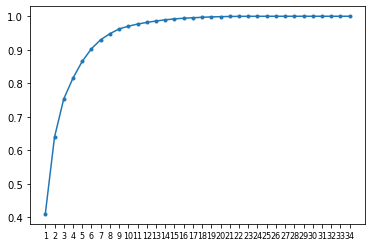

In [ ]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(1, 35), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,35), fontsize=8);

The graph above shows the cumulative variance explained as the number of principal components returned increases.  Intially, there was a dramatic increase in the proportion of explained variance, but this starts to level off as we incrementally add more components, mainly as it gets to 7 principle componenets.

Text(0, 0.5, 'Proportion of Explained Variance')

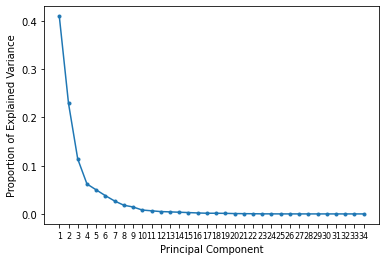

In [ ]:
# Plot the explained variance ratios of the first 34 principal components
plt.plot(range(1, 35), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 35), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

Above I was see the contribution of each component separately.  The first component explains the largest proportion of variance, and each additional component contributes less and less while keeping in mind that even though this graph is decreasing, increasing the number of components always increases the overall (cumulative) variance explained. Below I created a PCA model to capture 99% of the variance. 

In [ ]:
# PCA with 99% variance 
pca99 = PCA(n_components=.99)

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), pca99)

In [ ]:
transformer.fit_transform(X_train).shape

(673, 15)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_pipe_pca = make_pipeline(transformer, knn)

In [ ]:
knn_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.99))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
#%%time times how long the code takes to run
%%time
predictions_pca = knn_pipe_pca.predict(X_test)

CPU times: user 13.8 ms, sys: 0 ns, total: 13.8 ms
Wall time: 15.5 ms


In [ ]:
knn_pipe_no_pca = make_pipeline(scaler, knn)

In [ ]:
knn_pipe_no_pca.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
%%time
predictions_no_pca = knn_pipe_no_pca.predict(X_test)

CPU times: user 23.6 ms, sys: 14.5 ms, total: 38.1 ms
Wall time: 28.4 ms


We can see above that using the PCA helped run our model faster. Now that we know the model with reduced features runs faster, let's see if also continues to be more accurate! 

In [ ]:
pca_cm = confusion_matrix(y_test, predictions_pca)
no_pca_cm = confusion_matrix(y_test, predictions_no_pca)

PCA KNN matrix: 



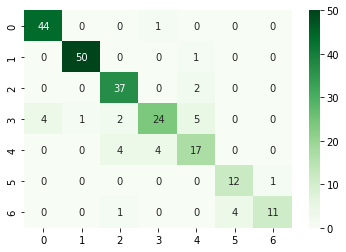

In [ ]:
pca_matrix = confusion_matrix(y_test, predictions_pca)
print('PCA KNN matrix: \n')
sns.heatmap(pca_matrix, annot=True, fmt = 'g', cmap='Greens');

No PCA KNN matrix: 



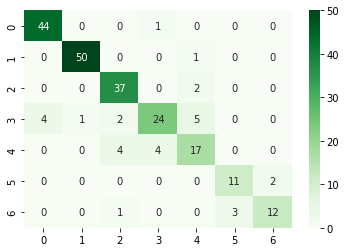

In [ ]:
no_pca_matrix = confusion_matrix(y_test, predictions_no_pca)
print('No PCA KNN matrix: \n')
sns.heatmap(no_pca_matrix, annot=True, fmt = 'g', cmap='Greens');

In [ ]:
print('PCA', classification_report(y_test, predictions_pca))
print('No PCA', classification_report(y_test, predictions_no_pca))

PCA               precision    recall  f1-score   support

           1       0.92      0.98      0.95        45
           2       0.98      0.98      0.98        51
           3       0.84      0.95      0.89        39
           4       0.83      0.67      0.74        36
           5       0.68      0.68      0.68        25
           6       0.75      0.92      0.83        13
           7       0.92      0.69      0.79        16

    accuracy                           0.87       225
   macro avg       0.84      0.84      0.84       225
weighted avg       0.87      0.87      0.86       225

No PCA               precision    recall  f1-score   support

           1       0.92      0.98      0.95        45
           2       0.98      0.98      0.98        51
           3       0.84      0.95      0.89        39
           4       0.83      0.67      0.74        36
           5       0.68      0.68      0.68        25
           6       0.79      0.85      0.81        13
           7 

PCA model is faster and has just as much accruacy as the one without the PCA!

In [ ]:
# PCA with 99% variance 
pca99 = PCA(n_components=.99)

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), pca99)

In [ ]:
transformer.fit_transform(X_train).shape

(673, 15)

In [ ]:
rf = RandomForestRegressor(random_state = 42)

# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_pipe_pca = make_pipeline(transformer, rf)

In [ ]:
rf_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.99))])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
rf_pipe_pca.predict(X_test)

array([3.38, 3.27, 2.02, 2.07, 4.26, 2.99, 2.  , 4.2 , 1.  , 6.28, 1.99,
       5.36, 2.  , 4.47, 1.3 , 3.79, 6.26, 2.04, 3.07, 6.67, 1.  , 3.54,
       2.  , 6.78, 3.  , 3.78, 1.06, 6.09, 1.  , 1.03, 5.83, 2.  , 3.27,
       1.03, 2.67, 3.49, 3.92, 2.  , 1.65, 3.17, 2.39, 1.54, 4.88, 4.14,
       6.33, 4.11, 1.07, 2.17, 4.91, 4.12, 6.02, 2.05, 1.  , 3.1 , 4.74,
       6.98, 3.13, 1.03, 1.18, 1.06, 6.87, 3.67, 2.31, 2.  , 4.58, 4.21,
       4.34, 6.02, 3.14, 3.05, 2.  , 1.  , 3.56, 1.77, 1.03, 3.  , 2.  ,
       3.27, 4.4 , 4.56, 1.06, 2.16, 3.79, 2.65, 1.99, 4.26, 1.  , 4.1 ,
       4.78, 2.  , 4.77, 3.54, 1.51, 2.06, 4.08, 3.79, 2.  , 4.75, 2.24,
       6.09, 1.03, 3.06, 1.59, 3.81, 3.  , 3.99, 3.04, 3.74, 4.03, 2.04,
       6.41, 3.17, 1.72, 1.03, 2.2 , 1.99, 1.03, 3.  , 4.66, 3.14, 3.29,
       4.03, 6.  , 6.11, 6.06, 3.  , 4.11, 6.97, 4.48, 1.96, 6.77, 4.56,
       3.02, 1.  , 3.04, 6.78, 1.  , 4.36, 6.17, 1.28, 2.17, 1.06, 2.  ,
       2.05, 3.  , 2.25, 2.  , 3.08, 3.  , 1.  , 3.

In [ ]:
rf_pipe_pca_train_score = rf_pipe_pca.score(X_train, y_train)
rf_pipe_pca_test_score = rf_pipe_pca.score(X_test, y_test)
print(rf_pipe_pca_train_score)
print(rf_pipe_pca_test_score)

0.9783175794460696
0.9068269019951765


It looks like the training dataset has a higher R2 score. This may mean that it's overfit! This means that our prediction line could be fitting exactly with the values in the dataset, meaning that it may not respond will to new data. Let's see what I can do about that!

In [ ]:
rf_9 = RandomForestRegressor(max_depth = 50, random_state = 42)
rf_9.fit(X_train, y_train)
rf_9_train_score = rf_9.score(X_train, y_train)
rf_9_test_score = rf_9.score(X_test, y_test)
print(rf_9_train_score)
print(rf_9_test_score)

0.9850347198787709
0.9144674961631221


In [ ]:
[estimator.get_depth() for estimator in rf.estimators_]

[10,
 11,
 9,
 10,
 10,
 10,
 11,
 12,
 11,
 9,
 10,
 10,
 10,
 10,
 12,
 10,
 12,
 10,
 11,
 10,
 12,
 11,
 9,
 12,
 11,
 11,
 11,
 10,
 12,
 9,
 10,
 13,
 12,
 9,
 9,
 10,
 10,
 13,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 12,
 11,
 11,
 9,
 11,
 10,
 11,
 11,
 12,
 10,
 11,
 9,
 12,
 10,
 14,
 10,
 11,
 12,
 12,
 10,
 10,
 13,
 11,
 10,
 10,
 11,
 13,
 9,
 13,
 12,
 10,
 11,
 9,
 10,
 10,
 12,
 9,
 10,
 12,
 10,
 10,
 11,
 11,
 11,
 10,
 10,
 9,
 9,
 10,
 11,
 10,
 10,
 11,
 10,
 10]

I was playing around with the max_depth value a bit, and even as I was doing so, I still wasn't able to see a R2 test value up to the same level as the train value. 

In [ ]:
# Try 200 trees
rf_200 = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Fit the model
rf_200.fit(X_train, y_train)
# Obtain the scores
rf_200_train_score = rf_200.score(X_train, y_train)
rf_200_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.9847235613255625
0.9135058443871958


Improvements may still need to be made about my model regaridng it's accuracy and ability to take on new data, but we have found a way to get it to process information faster which may be helpful for future use!